In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [31]:
df = {}
with open('datav2.txt', 'r') as f:
    data = f.read()
    data_lines = data.split('\n')
    headers = data_lines[0].split()
    for header in headers:
        df[header] = []
    
    for line in data_lines[1:]:
        if line:
            values = line.split()
            if len(values) != len(headers):
                print("Skipping line: ", line)
                continue
            try:
                for i, header in enumerate(headers):
                    df[header].append(values[i])
            except IndexError:
                pass


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x86 in position 7129: invalid start byte

In [34]:
df = pd.read_csv('datav4.csv')

In [35]:
df.head()

,Model,Parameters (B),Month,Year,Unnamed: 4,Unnamed: 5
0,GPT-4o mini,8.0,7,2024,NaN,NaN
1,NeMo,12.0,7,2024,NaN,NaN
2,Codestral Mamba,7.0,7,2024,NaN,NaN
3,Mathstral,7.0,7,2024,NaN,NaN
4,SpreadsheetLLM,1760.0,7,2024,NaN,NaN


In [36]:
#remove last 2 columns
df = df.iloc[:, :-2]

In [37]:
#i have a column Month, and column Year, I want to plot by date the frequency of models
df['Date'] = df['Year'].astype(str) + '-' + df['Month'].astype(str)
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m')
df = df.drop(['Month', 'Year'], axis=1)

df.head()


,Model,Parameters (B),Date
0,GPT-4o mini,8.0,2024-07-01
1,NeMo,12.0,2024-07-01
2,Codestral Mamba,7.0,2024-07-01
3,Mathstral,7.0,2024-07-01
4,SpreadsheetLLM,1760.0,2024-07-01


Text(0.5, 1.0, 'Frequency of models')

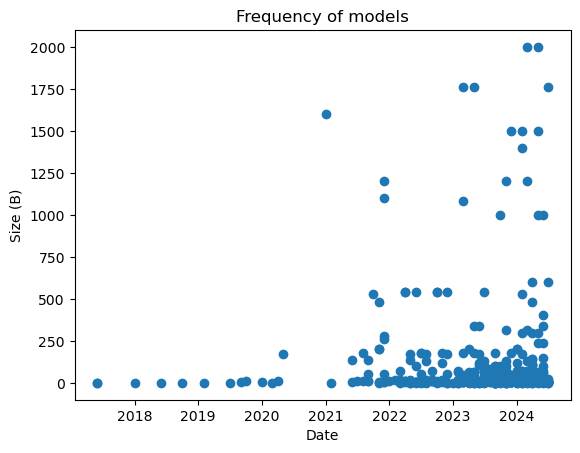

In [43]:
#plot frequency vs date
#but use just dots instead of lines
#plt.figure(figsize=(20,10))
plt.plot(df['Date'], df['Parameters (B)'], 'o')
plt.xlabel('Date')
plt.ylabel('Size (B)')
plt.title('Frequency of models')


<Axes: xlabel='Date'>

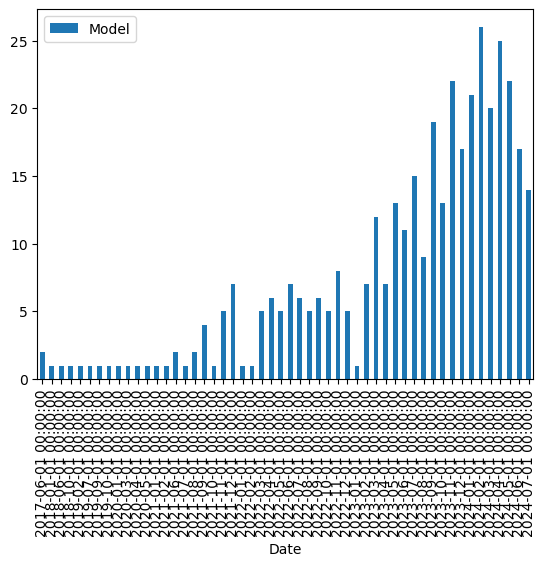

In [48]:
df.groupby('Date').count().plot(y='Model', kind='bar')

ValueError: x and y must have same first dimension, but have shapes (388,) and (52,)

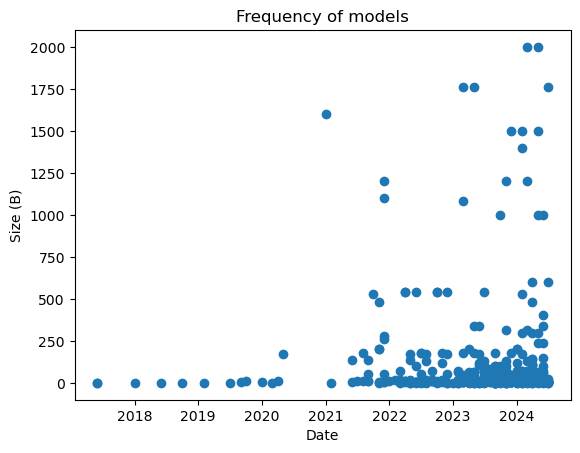

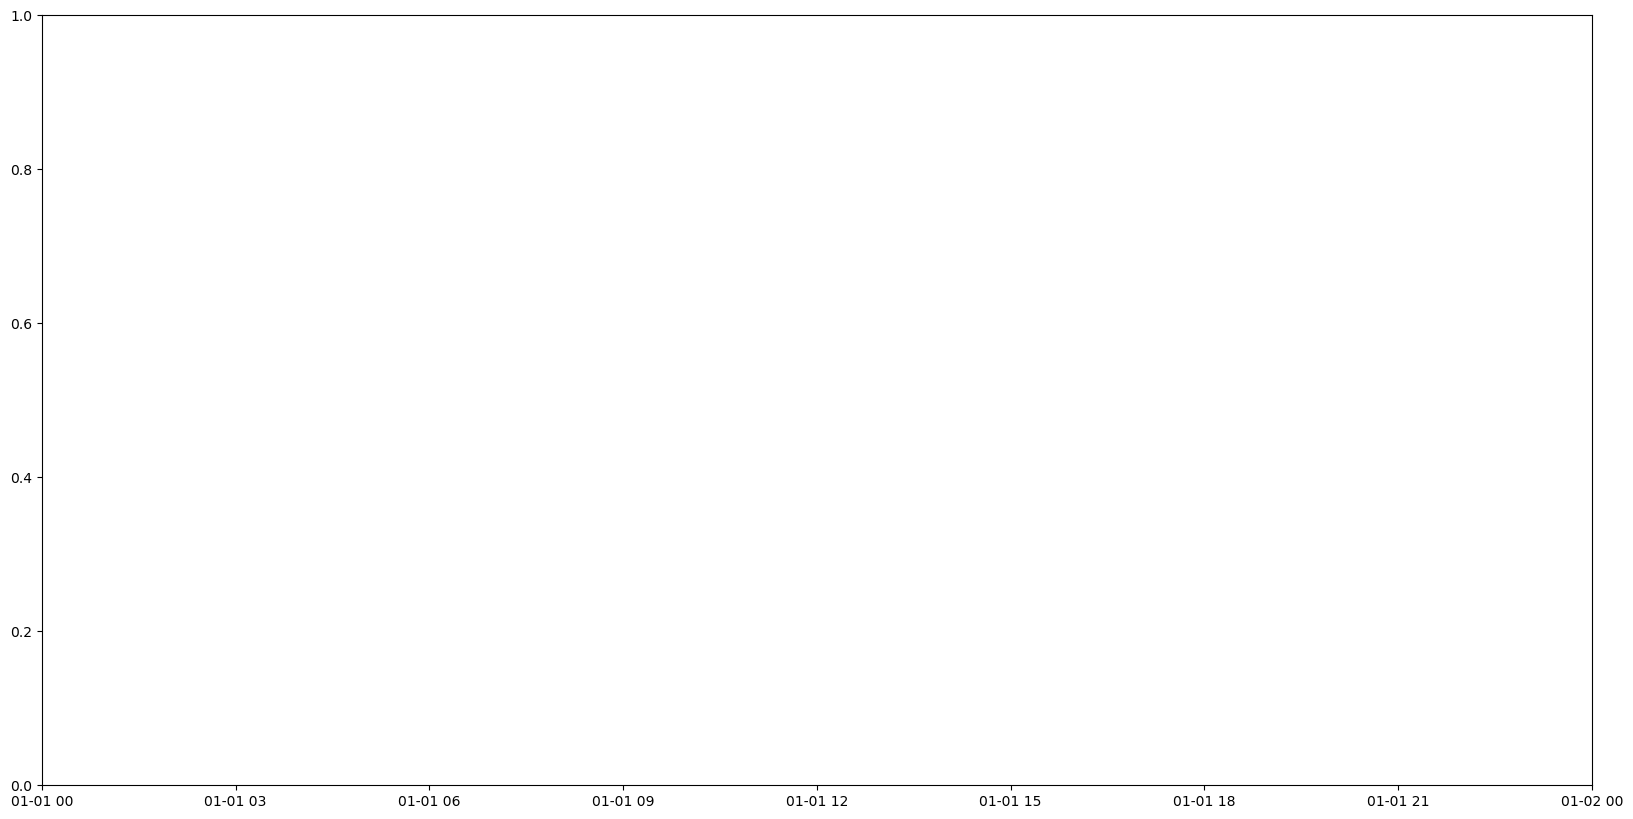

In [45]:
plt.plot(df['Date'], df['Parameters (B)'], 'o')
plt.xlabel('Date')
plt.ylabel('Size (B)')
plt.title('Frequency of models')
#Plot the counts of data points per date and make it a bar plot
plt.figure(figsize=(20,10))
plt.plot(df['Date'],df['Date'].value_counts())

plt.xlabel('Date')
plt.ylabel('Frequency')


<Axes: xlabel='Date'>

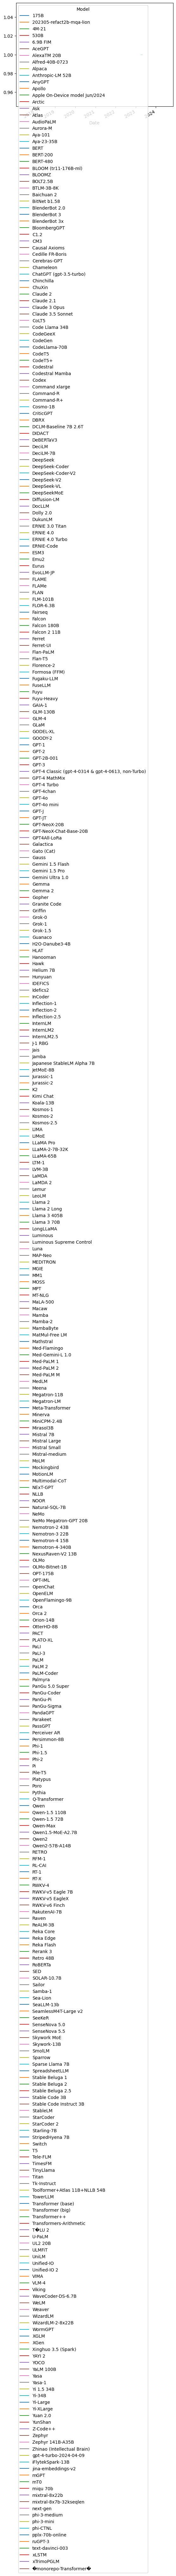

In [39]:
#plot by size of model vs date

df.groupby(['Date', 'Model']).size().unstack().plot()


In [7]:
data.head()

,Model,"Lab ""Parameters(B)""",Announced,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
GPT-4o mini,OpenAI,8.0,Jul/2024,NaN,NaN,NaN,NaN
NeMo,Mistral,12.0,Jul/2024,NaN,NaN,NaN,NaN
Codestral Mamba,Mistral,7.0,Jul/2024,NaN,NaN,NaN,NaN
Mathstral,Mistral,7.0,Jul/2024,NaN,NaN,NaN,NaN
SpreadsheetLLM,Microsoft,1760.0,Jul/2024,NaN,NaN,NaN,NaN


In [8]:
#drop last 4 colu,ms
data = data.drop(data.columns[[-1, -2, -3, -4]], axis=1)

In [9]:
data.head()

,Model,"Lab ""Parameters(B)""",Announced
GPT-4o mini,OpenAI,8.0,Jul/2024
NeMo,Mistral,12.0,Jul/2024
Codestral Mamba,Mistral,7.0,Jul/2024
Mathstral,Mistral,7.0,Jul/2024
SpreadsheetLLM,Microsoft,1760.0,Jul/2024


/var/folders/cm/sn2bpgln3zdc0lh8s2384hr40000gn/T/ipykernel_72764/4257696822.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['date'] = pd.to_datetime(data['Announced'])


<Axes: xlabel='date'>

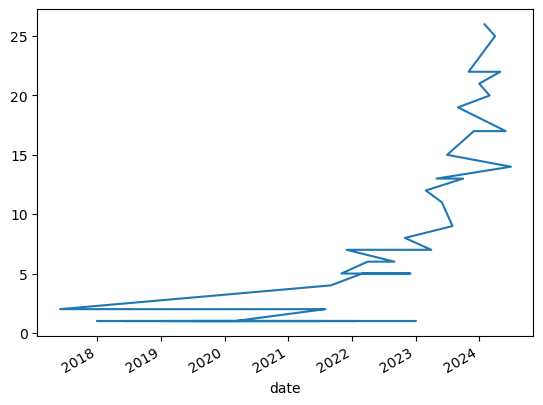

In [11]:
#plot date vs frequency of models
data['date'] = pd.to_datetime(data['Announced'])
#organize data by date
data = data.sort_values(by='Announced')
data['date'].value_counts().plot()

In [13]:
#replace the Announced "MTH/YR" with "##-####"
data['Announced'] = data['Announced'].str.replace(r'(\d{1,2})/(\d{4})', r'\1-\2')
data['Announced'] = pd.to_datetime(data['Announced'], format='%m-%Y')
data['Announced'].value_counts().plot()

ValueError: time data "Apr-2020" doesn't match format "%m-%Y", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.